Don't yet understand how this works in practice, but wanted to get some thoughts down about the theory of how this all works.

## Overview

So for a given image, our model's prediction will have the following scheme:

- Generate a box around an object, defined by
    - `bx`, `by`: coordinates of the center of the box
    - `bw`, `bh`: width and height of the boxes
- Note: these values are scaled *as percentages* between `(0, 0)` and `(1, 1)`, as we assume unit length of the image

In [1]:
from IPython.display import Image

Image('images/bounding_box.png')

Then (in this example, a 3-class detection problem) we provide the following vector for our prediction:

- Probability that there's any object
- The 4 parameters listed above
- Probability that we're looking at each of the objects

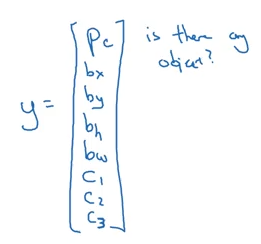

In [2]:
Image('images/bounding_box_labels.png')

### Loss Function

Our loss function is dependent on whether or not we predict that an object is there

(Intuitively, though, I figured we'd implement some sort of log-loss cross/entropy function here...)

If `y = 1`

$((\hat{y_1} - y_1)^2 + ... + (\hat{y_8} - y_8)^2)$

If `y = 0`

$(\hat{y_1} - y_1)^2$

## Generating Boxes

So assuming that we've got labelled data (by class, location, and bounding box size-- which the course didn't cover generating), we know how to score our prediction. But how do we generate our boxes.

### Via Convolution

We could slide over our dataset and get a bunch of boxes via convolution.

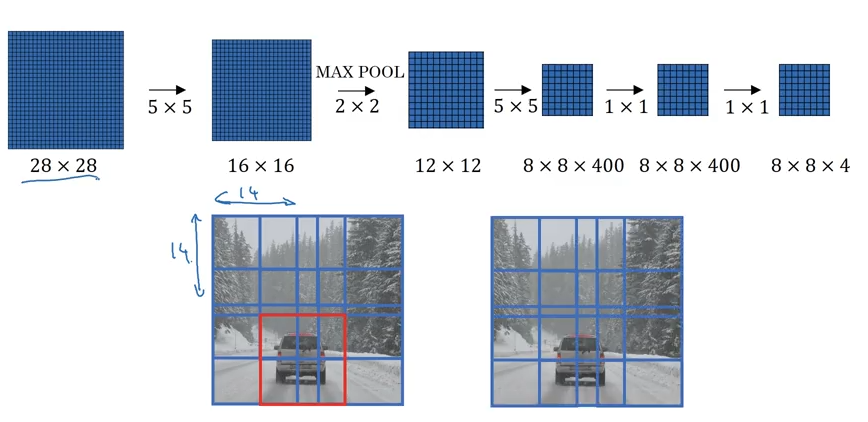

In [3]:
Image('images/sliding_windows.png')

### YOLO

This is the first the course uses when it dives into the YOLO algorithm, with out any suggestion of how those red boxes are generated. Idk.

They also suggest using something closer to a `19x19` grid, but leave it as 3s for illustration.

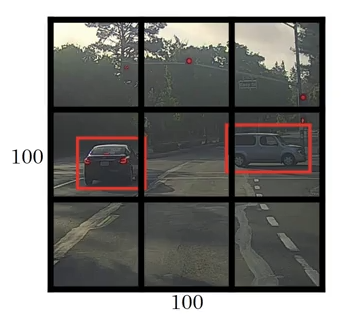

In [4]:
Image('images/yolo_basic.png')

For a 3-class problem apply the same `1x8` vector as above, giving you a final matrix representation of `3x3x8`. So if your image starts off `100x100x3`, make sure whatever Convoluation/Pooling steps along the way get you to an output of this size.

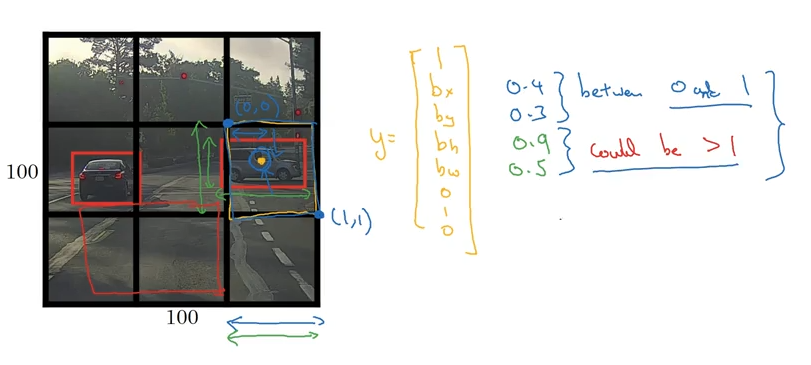

In [5]:
Image('images/yolo_bounding_boxes.png')

Then, once you've got all of your boxes, you want to trim down the redundant ones.

### Non-Maximum Suppression

So when you've got two boxes that overlap, like the ones below, you can define a metric *Intersection Over Union*

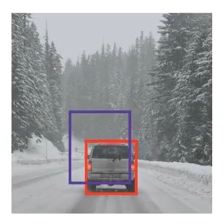

In [6]:
Image('images/iou1.png')

Here we represent intersection with the yellow, union with the green.

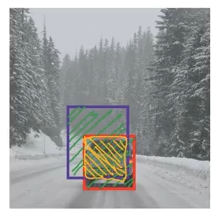

In [7]:
Image('images/iou2.png')

We can apply it to images that returned more boxes

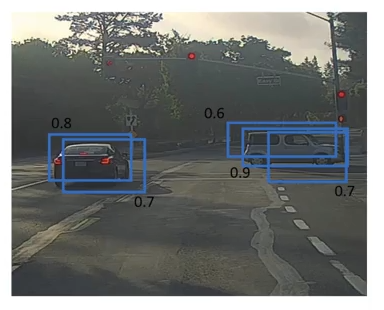

In [8]:
Image('images/non_max_1.png')

To simply our representation of where we think the objects are.

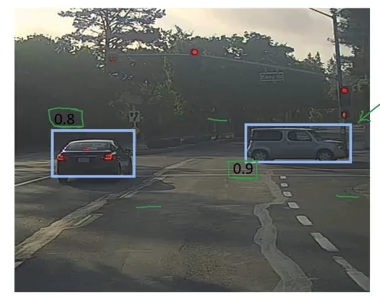

In [9]:
Image('images/non_max_2.png')

More generally, the idea is that we use the following algorithm

    For each individual class
    
        Discard all boxes with p_c < .6

        While remaining boxes:
            Pick box w largest p_c
        
            Discard any remaining box w IoU >= 0.5 w this box

To go from busy pictures like this

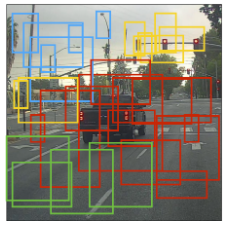

In [10]:
Image('images/yolo_multiclass_1.png')

to incrementally-less busy pictures

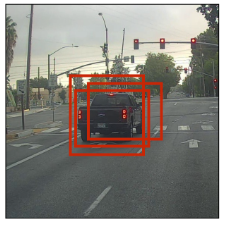

In [11]:
Image('images/yolo_multiclass_2.png')

Until we have a box per object

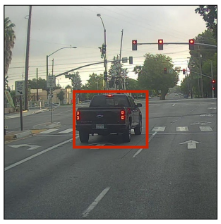

In [12]:
Image('images/yolo_multiclass_3.png')

(Omitted, the blue, yellow, and green reductions, for some reason.)